<a href="https://colab.research.google.com/github/elif-cetiin/loan-risk-analysis/blob/main/LoanData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y r-base



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.5.2-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [ ]:
%load_ext rpy2.ipython


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving LoanData.csv to LoanData.csv


In [ ]:
import os
os.listdir()


['.config', 'LoanData.csv', 'sample_data']

In [ ]:
%%R
loan.data <- read.csv("LoanData.csv")
is.data.frame(loan.data)
head(loan.data)


  ApplicationDate Age AnnualIncome CreditScore LoanAmount LoanDuration
1        1/1/2018  45        39948         617      13152           48
2        1/2/2018  38        39709         628      26045           48
3        1/3/2018  47        40724         570      17627           36
4        1/4/2018  58        69084         545      37898           96
5        1/5/2018  37       103264         594       9184           36
6        1/6/2018  37       178310         626      15433           72
  EducationLevel Experience EmploymentStatus MaritalStatus NumberOfDependents
1         Master         22         Employed       Married                  2
2      Associate         15         Employed        Single                  1
3       Bachelor         26         Employed       Married                  2
4    High School         34         Employed        Single                  1
5      Associate         17         Employed       Married                  1
6         Master         16    Self

In [ ]:
%%R
str(loan.data)


'data.frame':	1372 obs. of  36 variables:
 $ ApplicationDate           : chr  "1/1/2018" "1/2/2018" "1/3/2018" "1/4/2018" ...
 $ Age                       : num  45 38 47 58 58 49 42 18 19 27 ...
 $ AnnualIncome              : num  39948 39709 40724 69084 51250 ...
 $ CreditScore               : num  617 628 570 545 564 516 573 580 597 582 ...
 $ LoanAmount                : num  13152 26045 17627 37898 12741 ...
 $ LoanDuration              : num  48 48 36 96 48 12 60 60 36 60 ...
 $ EducationLevel            : chr  "Master" "Associate" "Bachelor" "High School" ...
 $ Experience                : int  22 15 26 34 39 23 21 0 0 7 ...
 $ EmploymentStatus          : chr  "Employed" "Employed" "Employed" "Employed" ...
 $ MaritalStatus             : chr  "Married" "Single" "Married" "Single" ...
 $ NumberOfDependents        : int  2 1 2 1 0 5 1 1 1 1 ...
 $ HomeOwnershipStatus       : chr  "Own" "Mortgage" "Rent" "Mortgage" ...
 $ MonthlyDebtPayments       : int  183 496 902 755 337 288 258 

In [ ]:
%%R
loan.data <- read.csv("LoanData.csv")



In [ ]:
%%R
loan.data$Age                   <- as.numeric(loan.data$Age)
loan.data$AnnualIncome          <- as.numeric(loan.data$AnnualIncome)
loan.data$CreditScore           <- as.numeric(loan.data$CreditScore)
loan.data$LoanAmount            <- as.numeric(loan.data$LoanAmount)
loan.data$LoanDuration          <- as.numeric(loan.data$LoanDuration)
loan.data$NetWorth              <- as.numeric(loan.data$NetWorth)
loan.data$BaseInterestRate      <- as.numeric(loan.data$BaseInterestRate)
loan.data$InterestRate          <- as.numeric(loan.data$InterestRate)
loan.data$MonthlyLoanPayment    <- as.numeric(loan.data$MonthlyLoanPayment)
loan.data$TotalDebtToIncomeRatio <- as.numeric(loan.data$TotalDebtToIncomeRatio)
loan.data$RiskScore             <- as.numeric(loan.data$RiskScore)

loan.data$LoanApproved <- as.factor(loan.data$LoanApproved)

is.numeric(loan.data$Age)
is.factor(loan.data$LoanApproved)


[1] TRUE


In [ ]:
%%R
colSums(is.na(loan.data))


           ApplicationDate                        Age 
                         0                          0 
              AnnualIncome                CreditScore 
                         0                          0 
                LoanAmount               LoanDuration 
                         0                          0 
            EducationLevel                 Experience 
                         0                          0 
          EmploymentStatus              MaritalStatus 
                         0                          0 
        NumberOfDependents        HomeOwnershipStatus 
                         0                          0 
       MonthlyDebtPayments  CreditCardUtilizationRate 
                         0                          0 
   NumberOfOpenCreditLines    NumberOfCreditInquiries 
                         0                          0 
         DebtToIncomeRatio          BankruptcyHistory 
                         0                          0 
          

In [ ]:
%%R
loan.data$Age                   <- as.numeric(loan.data$Age)
loan.data$AnnualIncome          <- as.numeric(loan.data$AnnualIncome)
loan.data$CreditScore           <- as.numeric(loan.data$CreditScore)
loan.data$LoanAmount            <- as.numeric(loan.data$LoanAmount)
loan.data$LoanDuration          <- as.numeric(loan.data$LoanDuration)
loan.data$NetWorth              <- as.numeric(loan.data$NetWorth)
loan.data$BaseInterestRate      <- as.numeric(loan.data$BaseInterestRate)
loan.data$InterestRate          <- as.numeric(loan.data$InterestRate)
loan.data$MonthlyLoanPayment    <- as.numeric(loan.data$MonthlyLoanPayment)
loan.data$TotalDebtToIncomeRatio <- as.numeric(loan.data$TotalDebtToIncomeRatio)
loan.data$RiskScore             <- as.numeric(loan.data$RiskScore)

loan.data$LoanApproved <- as.factor(loan.data$LoanApproved)

colSums(is.na(loan.data))
str(loan.data)


'data.frame':	1999 obs. of  36 variables:
 $ ApplicationDate           : chr  "1/1/2018" "1/2/2018" "1/3/2018" "1/4/2018" ...
 $ Age                       : num  45 38 47 58 37 37 58 49 34 46 ...
 $ AnnualIncome              : num  39948 39709 40724 69084 103264 ...
 $ CreditScore               : num  617 628 570 545 594 626 564 516 603 612 ...
 $ LoanAmount                : num  13152 26045 17627 37898 9184 ...
 $ LoanDuration              : num  48 48 36 96 36 72 48 12 60 12 ...
 $ EducationLevel            : chr  "Master" "Associate" "Bachelor" "High School" ...
 $ Experience                : int  22 15 26 34 17 16 39 23 12 19 ...
 $ EmploymentStatus          : chr  "Employed" "Employed" "Employed" "Employed" ...
 $ MaritalStatus             : chr  "Married" "Single" "Married" "Single" ...
 $ NumberOfDependents        : int  2 1 2 1 1 0 0 5 5 4 ...
 $ HomeOwnershipStatus       : chr  "Own" "Mortgage" "Rent" "Mortgage" ...
 $ MonthlyDebtPayments       : int  183 496 902 755 274 732 3

In [ ]:
%%R
head(loan.data)


  ApplicationDate Age AnnualIncome CreditScore LoanAmount LoanDuration
1        1/1/2018  45        39948         617      13152           48
2        1/2/2018  38        39709         628      26045           48
3        1/3/2018  47        40724         570      17627           36
4        1/4/2018  58        69084         545      37898           96
5        1/5/2018  37       103264         594       9184           36
6        1/6/2018  37       178310         626      15433           72
  EducationLevel Experience EmploymentStatus MaritalStatus NumberOfDependents
1         Master         22         Employed       Married                  2
2      Associate         15         Employed        Single                  1
3       Bachelor         26         Employed       Married                  2
4    High School         34         Employed        Single                  1
5      Associate         17         Employed       Married                  1
6         Master         16    Self

In [ ]:
%%R
cor(loan.data[, c("AnnualIncome", "CreditScore", "LoanAmount",
                  "DebtToIncomeRatio", "MonthlyIncome", "RiskScore")],
    use = "complete.obs")



                  AnnualIncome   CreditScore   LoanAmount DebtToIncomeRatio
AnnualIncome       1.000000000  0.1124189338 -0.006601071     -0.0275185436
CreditScore        0.112418934  1.0000000000 -0.016107907      0.0004231599
LoanAmount        -0.006601071 -0.0161079074  1.000000000      0.0285655415
DebtToIncomeRatio -0.027518544  0.0004231599  0.028565541      1.0000000000
MonthlyIncome      0.987217358  0.1173937453 -0.008612671     -0.0305081049
RiskScore         -0.479252460 -0.2395716800  0.142430567      0.3368359207
                  MonthlyIncome  RiskScore
AnnualIncome        0.987217358 -0.4792525
CreditScore         0.117393745 -0.2395717
LoanAmount         -0.008612671  0.1424306
DebtToIncomeRatio  -0.030508105  0.3368359
MonthlyIncome       1.000000000 -0.4863088
RiskScore          -0.486308773  1.0000000


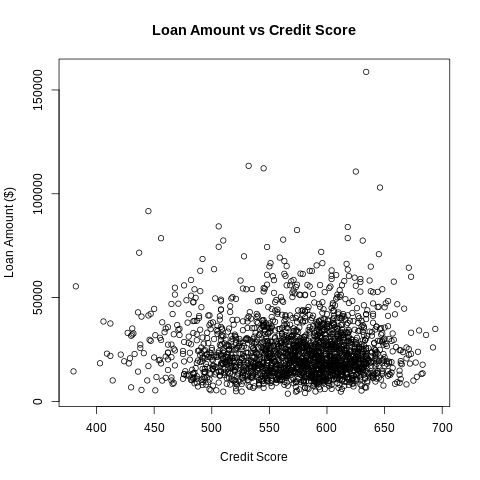

In [ ]:
%%R
plot(loan.data$CreditScore, loan.data$LoanAmount,
       main = "Loan Amount vs Credit Score",
       xlab = "Credit Score",
       ylab = "Loan Amount ($)")


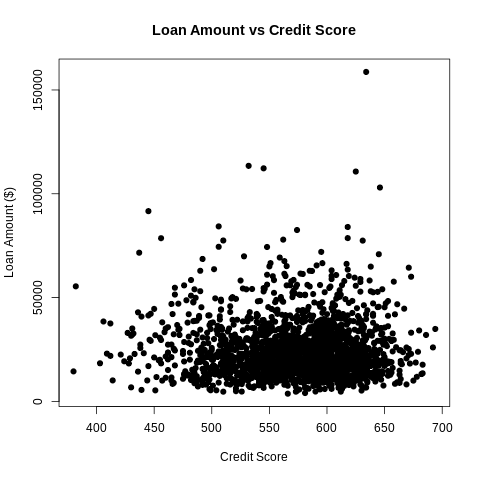

In [ ]:
%%R
plot(loan.data$CreditScore, loan.data$LoanAmount,
     main = "Loan Amount vs Credit Score",
     xlab = "Credit Score",
     ylab = "Loan Amount ($)",
     pch = 19,
     col = "black")


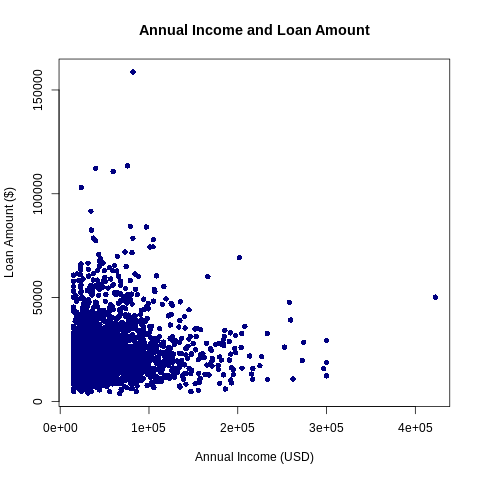

In [ ]:
%%R
plot(loan.data$AnnualIncome, loan.data$LoanAmount,
     main = "Annual Income and Loan Amount",
     xlab = "Annual Income (USD)",
     ylab = "Loan Amount ($)",
     pch = 16,        # solid circle
     col = "navy")


In [ ]:
%%R
# Ensure key variables are numeric
loan.data$AnnualIncome       <- as.numeric(loan.data$AnnualIncome)
loan.data$CreditScore        <- as.numeric(loan.data$CreditScore)
loan.data$LoanAmount         <- as.numeric(loan.data$LoanAmount)
loan.data$DebtToIncomeRatio  <- as.numeric(loan.data$DebtToIncomeRatio)
loan.data$MonthlyIncome      <- as.numeric(loan.data$MonthlyIncome)
loan.data$RiskScore          <- as.numeric(loan.data$RiskScore)

# Create derived variables for easier interpretation
loan.data$IncomeK <- loan.data$AnnualIncome / 1000      # income in thousands
loan.data$DTIRatioPercent <- loan.data$DebtToIncomeRatio * 100  # DTI percentage

# Check to confirm
head(cbind(
  AnnualIncome = loan.data$AnnualIncome,
  IncomeK = loan.data$IncomeK,
  DebtToIncomeRatio = loan.data$DebtToIncomeRatio,
  DTIRatioPercent = loan.data$DTIRatioPercent,
  CreditScore = loan.data$CreditScore,
  RiskScore = loan.data$RiskScore
))


     AnnualIncome IncomeK DebtToIncomeRatio DTIRatioPercent CreditScore
[1,]        39948  39.948        0.35833560       35.833560         617
[2,]        39709  39.709        0.33027367       33.027367         628
[3,]        40724  40.724        0.24472911       24.472911         570
[4,]        69084  69.084        0.43624427       43.624426         545
[5,]       103264 103.264        0.07888421        7.888421         594
[6,]       178310 178.310        0.25936640       25.936640         626
     RiskScore
[1,]        49
[2,]        52
[3,]        52
[4,]        54
[5,]        36
[6,]        44


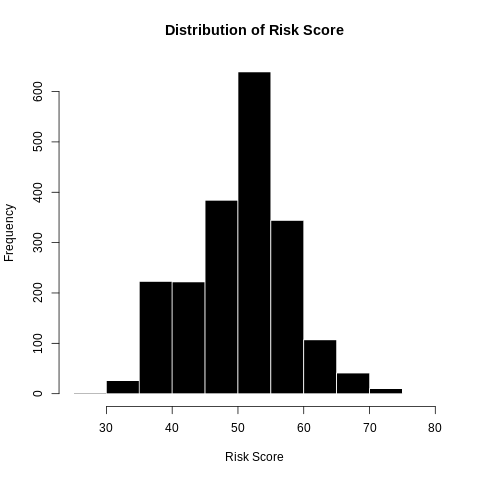

In [ ]:
%%R
hist(loan.data$RiskScore,
     main = "Distribution of Risk Score",
     xlab = "Risk Score",
     col = "BLACK",
     border = "white")



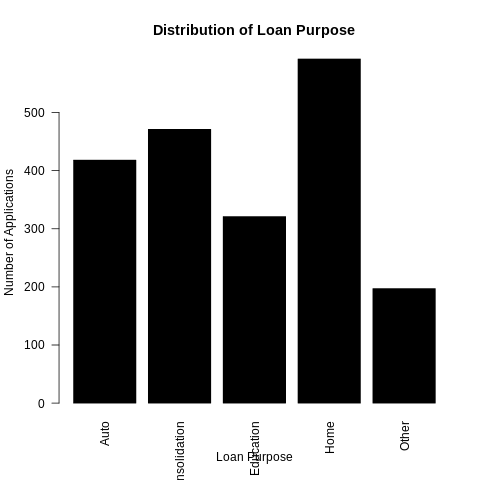

In [ ]:

%%R
barplot(table(loan.data$LoanPurpose),
        main = "Distribution of Loan Purpose",
        xlab = "Loan Purpose",
        ylab = "Number of Applications",
        col = "BLACK",
        las = 2)



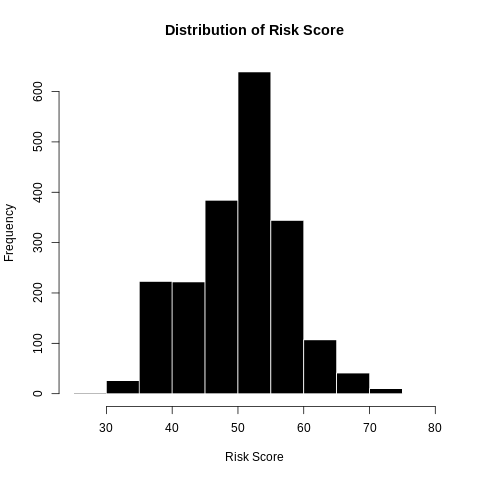

In [ ]:
%%R
hist(loan.data$RiskScore,
     main = "Distribution of Risk Score",
     xlab = "Risk Score",
     col = "black",
     border = "white")



In [ ]:
%%R
emp.reg <- lm(RiskScore ~ EmploymentStatus, data = loan.data)
summary(emp.reg)



Call:
lm(formula = RiskScore ~ EmploymentStatus, data = loan.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.3607  -4.6486   0.8393   4.8393  25.9019 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    50.1607     0.1839 272.824  < 2e-16 ***
EmploymentStatusSelf-Employed   2.9374     0.6360   4.618 4.12e-06 ***
EmploymentStatusUnemployed      4.4879     0.6579   6.821 1.19e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.581 on 1996 degrees of freedom
Multiple R-squared:  0.03068,	Adjusted R-squared:  0.02971 
F-statistic: 31.59 on 2 and 1996 DF,  p-value: 3.114e-14



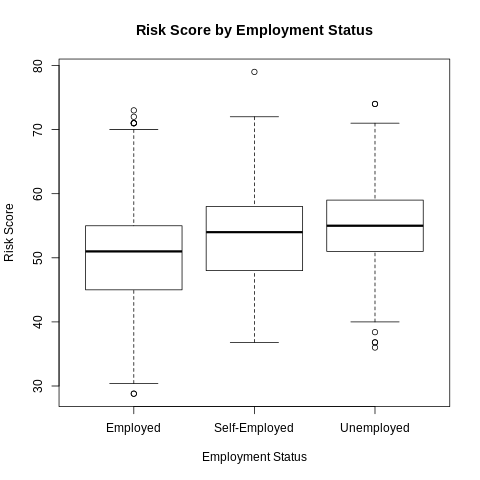

In [ ]:
%%R
boxplot(RiskScore ~ EmploymentStatus,
        data = loan.data,
        col = "white",
        border = "black",
        main = "Risk Score by Employment Status",
        xlab = "Employment Status",
        ylab = "Risk Score")


In [ ]:
%%R
# AnnualIncome'a göre gelir seviyesini kategorik değişkene çeviriyoruz
loan.data$IncomeLevel <- cut(
  loan.data$AnnualIncome,
  breaks = c(-Inf, 40000, 80000, Inf),
  labels = c("Low", "Middle", "High"),
  right = TRUE
)

# Kontrol için frekans tablosu
table(loan.data$IncomeLevel)



   Low Middle   High 
   763    794    442 


In [ ]:
%%R
inc.reg <- lm(RiskScore ~ IncomeLevel, data = loan.data)
summary(inc.reg)



Call:
lm(formula = RiskScore ~ IncomeLevel, data = loan.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.1229  -4.0742  -0.0742   4.0771  29.4719 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        54.0742     0.2468 219.093   <2e-16 ***
IncomeLevelMiddle  -3.1513     0.3456  -9.118   <2e-16 ***
IncomeLevelHigh    -9.5461     0.4075 -23.425   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.817 on 1996 degrees of freedom
Multiple R-squared:  0.216,	Adjusted R-squared:  0.2152 
F-statistic:   275 on 2 and 1996 DF,  p-value: < 2.2e-16



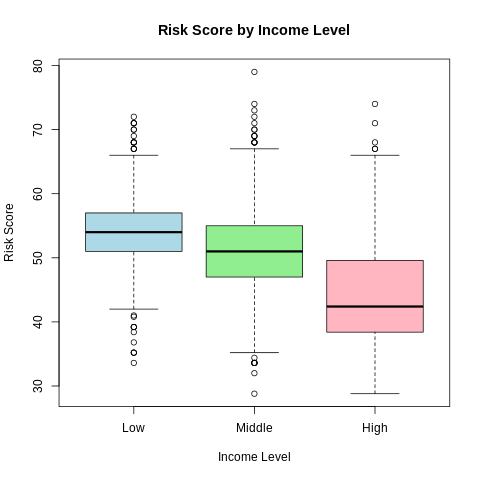

In [ ]:
%%R
boxplot(RiskScore ~ IncomeLevel,
        data = loan.data,
        main = "Risk Score by Income Level",
        xlab = "Income Level",
        ylab = "Risk Score",
        col = c("lightblue", "lightgreen", "lightpink"))


In [ ]:
%%R
str(loan.data)


'data.frame':	1999 obs. of  39 variables:
 $ ApplicationDate           : chr  "1/1/2018" "1/2/2018" "1/3/2018" "1/4/2018" ...
 $ Age                       : num  45 38 47 58 37 37 58 49 34 46 ...
 $ AnnualIncome              : num  39948 39709 40724 69084 103264 ...
 $ CreditScore               : num  617 628 570 545 594 626 564 516 603 612 ...
 $ LoanAmount                : num  13152 26045 17627 37898 9184 ...
 $ LoanDuration              : num  48 48 36 96 36 72 48 12 60 12 ...
 $ EducationLevel            : chr  "Master" "Associate" "Bachelor" "High School" ...
 $ Experience                : int  22 15 26 34 17 16 39 23 12 19 ...
 $ EmploymentStatus          : chr  "Employed" "Employed" "Employed" "Employed" ...
 $ MaritalStatus             : chr  "Married" "Single" "Married" "Single" ...
 $ NumberOfDependents        : int  2 1 2 1 1 0 0 5 5 4 ...
 $ HomeOwnershipStatus       : chr  "Own" "Mortgage" "Rent" "Mortgage" ...
 $ MonthlyDebtPayments       : int  183 496 902 755 274 732 3

In [ ]:
%%R
# Ensure LoanPurpose is treated as a categorical variable
loan.data$LoanPurpose <- as.factor(loan.data$LoanPurpose)

# Frequency table (optional, for checking)
table(loan.data$LoanPurpose)

# Regression model: RiskScore on LoanPurpose
purpose.reg <- lm(RiskScore ~ LoanPurpose, data = loan.data)
summary(purpose.reg)



Call:
lm(formula = RiskScore ~ LoanPurpose, data = loan.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.1014  -4.8885   0.9236   5.0106  27.9236 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   50.90144    0.37625 135.287   <2e-16 ***
LoanPurposeDebt Consolidation  0.17500    0.51691   0.339    0.735    
LoanPurposeEducation          -0.91203    0.57088  -1.598    0.110    
LoanPurposeHome               -0.01292    0.49144  -0.026    0.979    
LoanPurposeOther              -0.81819    0.66478  -1.231    0.219    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.692 on 1994 degrees of freedom
Multiple R-squared:  0.002886,	Adjusted R-squared:  0.0008856 
F-statistic: 1.443 on 4 and 1994 DF,  p-value: 0.2174



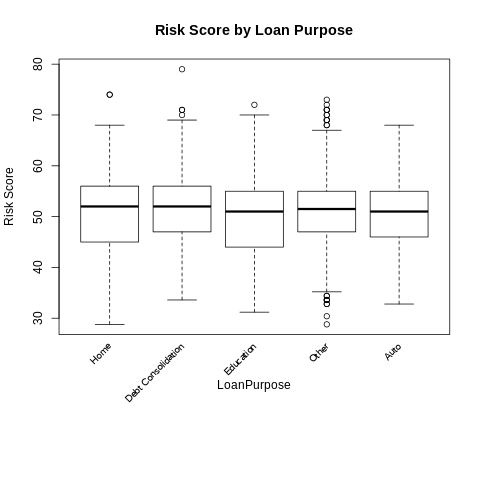

In [ ]:
%%R
par(mar = c(10, 4, 4, 2) + 0.1)

boxplot(RiskScore ~ LoanPurpose,
        data = loan.data,
        col = "white",
        border = "black",
        main = "Risk Score by Loan Purpose",
        ylab = "Risk Score",
        xaxt = "n")   # hide default x-axis

# custom x-axis at 45°
text(x = 1:length(unique(loan.data$LoanPurpose)),
     y = par("usr")[3] - 2,
     labels = unique(loan.data$LoanPurpose),
     srt = 45,
     xpd = TRUE,
     adj = 1,
     cex = 0.8)




In [ ]:
%%R
num.vars <- c("Age","AnnualIncome","CreditScore","LoanAmount","LoanDuration",
              "NetWorth","BaseInterestRate","InterestRate",
              "MonthlyLoanPayment","TotalDebtToIncomeRatio","RiskScore")

for (v in num.vars) {
  Q1 <- quantile(loan.data[[v]], 0.25, na.rm=TRUE)
  Q3 <- quantile(loan.data[[v]], 0.75, na.rm=TRUE)
  IQR <- Q3 - Q1
  lower <- Q1 - 1.5 * IQR
  upper <- Q3 + 1.5 * IQR
  loan.data <- loan.data[loan.data[[v]] >= lower & loan.data[[v]] <= upper, ]
}

dim(loan.data)


[1] 1372   36


In [ ]:
%%R
summary(loan.data)


 ApplicationDate         Age         AnnualIncome     CreditScore   
 Length:1372        Min.   :18.00   Min.   : 15000   Min.   :444.0  
 Class :character   1st Qu.:32.00   1st Qu.: 32766   1st Qu.:546.0  
 Mode  :character   Median :40.00   Median : 48865   Median :582.5  
                    Mean   :40.24   Mean   : 54883   Mean   :576.5  
                    3rd Qu.:48.00   3rd Qu.: 72160   3rd Qu.:610.0  
                    Max.   :72.00   Max.   :142326   Max.   :683.0  
   LoanAmount     LoanDuration   EducationLevel       Experience  
 Min.   : 3729   Min.   :12.00   Length:1372        Min.   : 0.0  
 1st Qu.:14658   1st Qu.:36.00   Class :character   1st Qu.: 9.0  
 Median :19940   Median :48.00   Mode  :character   Median :18.0  
 Mean   :21581   Mean   :51.56                      Mean   :17.9  
 3rd Qu.:26658   3rd Qu.:60.00                      3rd Qu.:25.0  
 Max.   :51450   Max.   :96.00                      Max.   :51.0  
 EmploymentStatus   MaritalStatus      NumberOfD

In [ ]:
%%R
# 5. Contingency Tables of Categorical Variables
# Cross-tabulation of Employment Status and Income Level

# Ensure IncomeLevel and EmploymentStatus are treated as factors
loan.data$IncomeLevel      <- as.factor(loan.data$IncomeLevel)
loan.data$EmploymentStatus <- as.factor(loan.data$EmploymentStatus)

# Contingency table: EmploymentStatus × IncomeLevel
cont.table1 <- table(loan.data$EmploymentStatus, loan.data$IncomeLevel)
cont.table1


               
                Low Middle High
  Employed      656    670  374
  Self-Employed  53     66   36
  Unemployed     54     58   32


In [ ]:
%%R
cont.table1 <- table(loan.data$EmploymentStatus, loan.data$IncomeLevel)
cont.table1

               
                Low Middle High
  Employed      656    670  374
  Self-Employed  53     66   36
  Unemployed     54     58   32


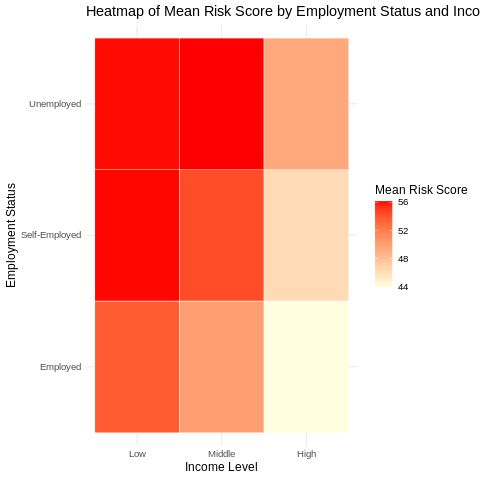

In [ ]:
%%R
library(ggplot2)


risk.grid <- aggregate(RiskScore ~ EmploymentStatus + IncomeLevel,
                       data = loan.data,
                       FUN  = mean)

ggplot(risk.grid,
       aes(x = IncomeLevel,
           y = EmploymentStatus,
           fill = RiskScore)) +
  geom_tile(color = "white") +
  scale_fill_gradient(low  = "lightyellow",
                      high = "red",
                      name = "Mean Risk Score") +
  labs(title = "Heatmap of Mean Risk Score by Employment Status and Income Level",
       x = "Income Level",
       y = "Employment Status") +
  theme_minimal(base_size = 12)


In [ ]:
%%R
model1 <- lm(RiskScore ~ AnnualIncome + CreditScore + DebtToIncomeRatio + LoanAmount,
             data = loan.data)
summary(model1)



Call:
lm(formula = RiskScore ~ AnnualIncome + CreditScore + DebtToIncomeRatio + 
    LoanAmount, data = loan.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.8295  -3.3875   0.0335   3.1332  28.0672 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        6.596e+01  1.589e+00   41.51  < 2e-16 ***
AnnualIncome      -8.335e-05  3.283e-06  -25.39  < 2e-16 ***
CreditScore       -2.871e-02  2.708e-03  -10.60  < 2e-16 ***
DebtToIncomeRatio  1.526e+01  8.352e-01   18.28  < 2e-16 ***
LoanAmount         7.212e-05  9.947e-06    7.25 5.93e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.036 on 1994 degrees of freedom
Multiple R-squared:  0.386,	Adjusted R-squared:  0.3848 
F-statistic: 313.5 on 4 and 1994 DF,  p-value: < 2.2e-16



In [ ]:
%%R
model2 <- lm(RiskScore ~ AnnualIncome + CreditScore + DebtToIncomeRatio +
               LoanAmount + IncomeLevel,
             data = loan.data)
summary(model2)



Call:
lm(formula = RiskScore ~ AnnualIncome + CreditScore + DebtToIncomeRatio + 
    LoanAmount + IncomeLevel, data = loan.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.6986  -3.4082  -0.1391   3.0066  27.7443 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        6.522e+01  1.579e+00  41.311  < 2e-16 ***
AnnualIncome      -4.934e-05  5.953e-06  -8.288  < 2e-16 ***
CreditScore       -2.817e-02  2.679e-03 -10.516  < 2e-16 ***
DebtToIncomeRatio  1.539e+01  8.263e-01  18.629  < 2e-16 ***
LoanAmount         7.335e-05  9.840e-06   7.454 1.34e-13 ***
IncomeLevelMiddle -1.649e+00  3.507e-01  -4.703 2.74e-06 ***
IncomeLevelHigh   -4.495e+00  6.575e-01  -6.837 1.07e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.969 on 1992 degrees of freedom
Multiple R-squared:  0.4002,	Adjusted R-squared:  0.3984 
F-statistic: 221.5 on 6 and 1992 DF,  p-value: < 2.2e-16



In [ ]:
%%R
model3 <- lm(RiskScore ~ AnnualIncome + CreditScore + DebtToIncomeRatio +
               LoanAmount + IncomeLevel + Age,
             data = loan.data)

summary(model3)



Call:
lm(formula = RiskScore ~ AnnualIncome + CreditScore + DebtToIncomeRatio + 
    LoanAmount + IncomeLevel + Age, data = loan.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.5465  -3.3898  -0.1446   3.0060  27.6694 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        6.520e+01  1.578e+00  41.319  < 2e-16 ***
AnnualIncome      -4.887e-05  5.956e-06  -8.205 4.07e-16 ***
CreditScore       -2.669e-02  2.809e-03  -9.500  < 2e-16 ***
DebtToIncomeRatio  1.534e+01  8.264e-01  18.559  < 2e-16 ***
LoanAmount         7.362e-05  9.836e-06   7.485 1.07e-13 ***
IncomeLevelMiddle -1.631e+00  3.507e-01  -4.652 3.50e-06 ***
IncomeLevelHigh   -4.465e+00  6.574e-01  -6.792 1.46e-11 ***
Age               -2.151e-02  1.231e-02  -1.748   0.0806 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.966 on 1991 degrees of freedom
Multiple R-squared:  0.4011,	Adjusted R-squared:  0.399 
F-statistic: 

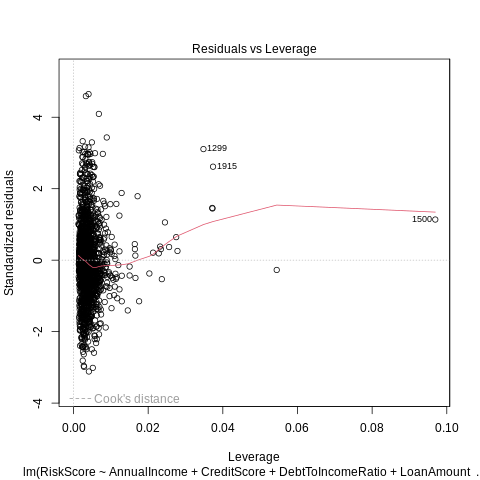

In [ ]:
%%R
plot(model3)


In [ ]:
%%R
model2b <- lm(sqrt(RiskScore) ~ AnnualIncome + CreditScore + DebtToIncomeRatio +
                LoanAmount + IncomeLevel,
              data = loan.data)

summary(model2b)



Call:
lm(formula = sqrt(RiskScore) ~ AnnualIncome + CreditScore + DebtToIncomeRatio + 
    LoanAmount + IncomeLevel, data = loan.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.36495 -0.23388  0.00056  0.21800  1.83508 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        8.159e+00  1.119e-01  72.922  < 2e-16 ***
AnnualIncome      -3.588e-06  4.219e-07  -8.505  < 2e-16 ***
CreditScore       -2.033e-03  1.899e-04 -10.707  < 2e-16 ***
DebtToIncomeRatio  1.071e+00  5.856e-02  18.283  < 2e-16 ***
LoanAmount         5.379e-06  6.974e-07   7.713 1.93e-14 ***
IncomeLevelMiddle -1.190e-01  2.485e-02  -4.790 1.79e-06 ***
IncomeLevelHigh   -3.292e-01  4.660e-02  -7.065 2.21e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.423 on 1992 degrees of freedom
Multiple R-squared:  0.4077,	Adjusted R-squared:  0.4059 
F-statistic: 228.5 on 6 and 1992 DF,  p-value: < 2.2e-16



In [ ]:
%%R
mr2b <- lm(sqrt(RiskScore) ~ AnnualIncome + CreditScore + DebtToIncomeRatio +
             LoanAmount + IncomeLevel,
           data = loan.data)

summary(mr2b)



Call:
lm(formula = sqrt(RiskScore) ~ AnnualIncome + CreditScore + DebtToIncomeRatio + 
    LoanAmount + IncomeLevel, data = loan.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.36495 -0.23388  0.00056  0.21800  1.83508 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        8.159e+00  1.119e-01  72.922  < 2e-16 ***
AnnualIncome      -3.588e-06  4.219e-07  -8.505  < 2e-16 ***
CreditScore       -2.033e-03  1.899e-04 -10.707  < 2e-16 ***
DebtToIncomeRatio  1.071e+00  5.856e-02  18.283  < 2e-16 ***
LoanAmount         5.379e-06  6.974e-07   7.713 1.93e-14 ***
IncomeLevelMiddle -1.190e-01  2.485e-02  -4.790 1.79e-06 ***
IncomeLevelHigh   -3.292e-01  4.660e-02  -7.065 2.21e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.423 on 1992 degrees of freedom
Multiple R-squared:  0.4077,	Adjusted R-squared:  0.4059 
F-statistic: 228.5 on 6 and 1992 DF,  p-value: < 2.2e-16



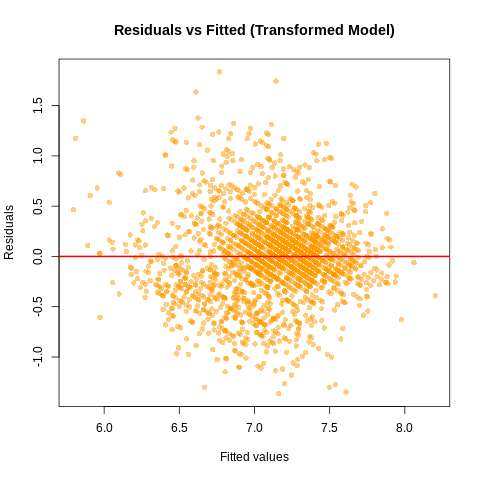

In [ ]:
%%R
plot(mr2b$fitted.values,
     mr2b$residuals,
     main = "Residuals vs Fitted (Transformed Model)",
     xlab = "Fitted values",
     ylab = "Residuals",
     pch = 16,
     col = rgb(1, 0.6, 0, 0.5))

abline(h = 0, col = "red", lwd = 2)


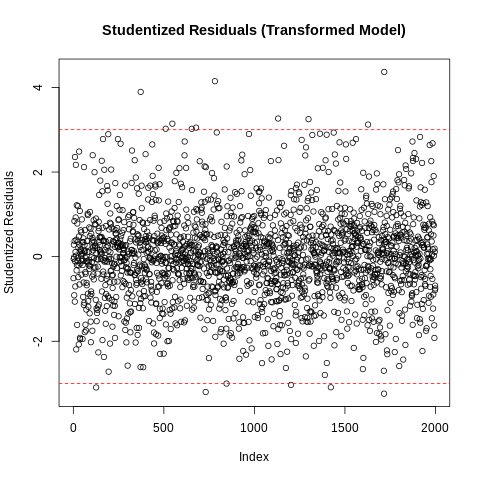

In [ ]:
%%R
plot(rstudent(mr2b),
     main = "Studentized Residuals (Transformed Model)",
     ylab = "Studentized Residuals")
abline(h = c(-3, 3), col = "red", lty = 2)


In [ ]:
%%R
loan.data.c <- loan.data[-c(45, 102), ]

mr2c <- lm(sqrt(RiskScore) ~ AnnualIncome + CreditScore +
             DebtToIncomeRatio + LoanAmount + IncomeLevel,
           data = loan.data.c)

summary(mr2c)



Call:
lm(formula = sqrt(RiskScore) ~ AnnualIncome + CreditScore + DebtToIncomeRatio + 
    LoanAmount + IncomeLevel, data = loan.data.c)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.36535 -0.23482  0.00073  0.21797  1.83515 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        8.160e+00  1.120e-01  72.857  < 2e-16 ***
AnnualIncome      -3.590e-06  4.221e-07  -8.505  < 2e-16 ***
CreditScore       -2.035e-03  1.901e-04 -10.705  < 2e-16 ***
DebtToIncomeRatio  1.071e+00  5.862e-02  18.266  < 2e-16 ***
LoanAmount         5.375e-06  6.978e-07   7.704 2.07e-14 ***
IncomeLevelMiddle -1.193e-01  2.487e-02  -4.795 1.74e-06 ***
IncomeLevelHigh   -3.293e-01  4.662e-02  -7.063 2.24e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4232 on 1990 degrees of freedom
Multiple R-squared:  0.4076,	Adjusted R-squared:  0.4058 
F-statistic: 228.2 on 6 and 1990 DF,  p-value: < 2.2e-16



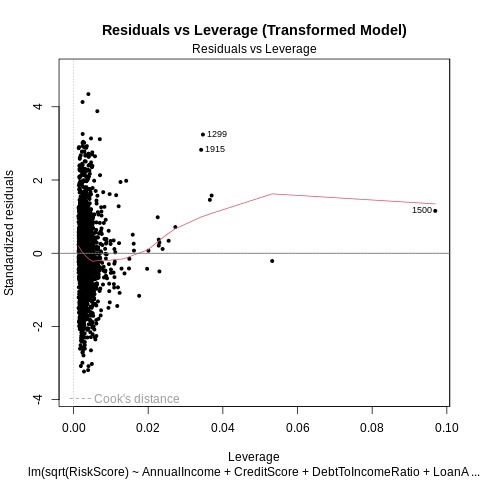

In [ ]:
%%R
## Figure 2.14 – Residuals vs Leverage (Cook's Distance)

# Use the transformed model (mr2b)
plot(mr2b,
     which = 5,      # Residuals vs Leverage plot
     main = "Residuals vs Leverage (Transformed Model)",
     pch = 19,
     cex = 0.6)

# Add Cook's Distance reference lines
cook.levels <- c(0.5, 1)  # common thresholds
abline(h = 0, col = "gray40")

for (cl in cook.levels) {
  cook.contour <- sqrt(cl * df.residual(mr2b) / (1 - hatvalues(mr2b)))
  lines(hatvalues(mr2b), cook.contour, col = "red", lty = 2)
  lines(hatvalues(mr2b), -cook.contour, col = "red", lty = 2)
}


In [ ]:
%%R
mr3 <- lm(sqrt(RiskScore) ~ AnnualIncome + CreditScore +
            DebtToIncomeRatio + LoanAmount + IncomeLevel,
          data = loan.data)

summary(mr3)



Call:
lm(formula = sqrt(RiskScore) ~ AnnualIncome + CreditScore + DebtToIncomeRatio + 
    LoanAmount + IncomeLevel, data = loan.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.36495 -0.23388  0.00056  0.21800  1.83508 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        8.159e+00  1.119e-01  72.922  < 2e-16 ***
AnnualIncome      -3.588e-06  4.219e-07  -8.505  < 2e-16 ***
CreditScore       -2.033e-03  1.899e-04 -10.707  < 2e-16 ***
DebtToIncomeRatio  1.071e+00  5.856e-02  18.283  < 2e-16 ***
LoanAmount         5.379e-06  6.974e-07   7.713 1.93e-14 ***
IncomeLevelMiddle -1.190e-01  2.485e-02  -4.790 1.79e-06 ***
IncomeLevelHigh   -3.292e-01  4.660e-02  -7.065 2.21e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.423 on 1992 degrees of freedom
Multiple R-squared:  0.4077,	Adjusted R-squared:  0.4059 
F-statistic: 228.5 on 6 and 1992 DF,  p-value: < 2.2e-16



In [ ]:
%%R
library(knitr)

coef_table <- data.frame(
  Term = c("(Intercept)",
           "AnnualIncome",
           "CreditScore",
           "DebtToIncomeRatio",
           "LoanAmount",
           "IncomeLevelMiddle",
           "IncomeLevelHigh",
           "Model Fit"),
  Interpretation = c(
    "Baseline sqrt(RiskScore) when predictors = 0",
    "Higher income → lower predicted credit risk",
    "Higher credit score → lower credit risk",
    "Higher DTI → higher predicted risk",
    "Larger loans → higher predicted risk",
    "Middle-income borrowers → lower risk",
    "High-income borrowers → much lower risk",
    "Adj. R² ≈ 0.4059; F-test p < 0.001"
  ),
  Estimate = c(
    8.159,
    -3.588e-06,
    -2.033e-03,
    1.071,
    5.379e-06,
    -0.119,
    -0.329,
    ""
  )
)

kable(coef_table, caption = "Figure 2.15 — Estimated Coefficients Summary (Loan Dataset)")




Table: Figure 2.15 — Estimated Coefficients Summary (Loan Dataset)

|Term              |Interpretation                               |Estimate   |
|:-----------------|:--------------------------------------------|:----------|
|(Intercept)       |Baseline sqrt(RiskScore) when predictors = 0 |8.159      |
|AnnualIncome      |Higher income → lower predicted credit risk  |-3.588e-06 |
|CreditScore       |Higher credit score → lower credit risk      |-0.002033  |
|DebtToIncomeRatio |Higher DTI → higher predicted risk           |1.071      |
|LoanAmount        |Larger loans → higher predicted risk         |5.379e-06  |
|IncomeLevelMiddle |Middle-income borrowers → lower risk         |-0.119     |
|IncomeLevelHigh   |High-income borrowers → much lower risk      |-0.329     |
|Model Fit         |Adj. R² ≈ 0.4059; F-test p < 0.001           |           |


corrplot 0.95 loaded


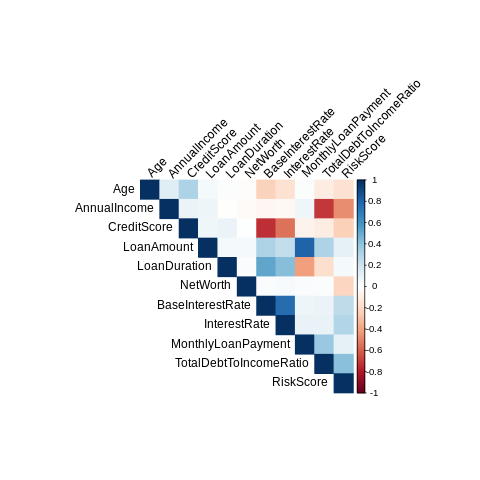

In [ ]:
%%R
library(corrplot)

num.vars <- c("Age","AnnualIncome","CreditScore","LoanAmount","LoanDuration",
              "NetWorth","BaseInterestRate","InterestRate",
              "MonthlyLoanPayment","TotalDebtToIncomeRatio","RiskScore")

corr.data <- loan.data[, num.vars]

cor.matrix <- cor(corr.data, use="complete.obs")

corrplot(cor.matrix, method="color", type="upper", tl.col="black", tl.srt=45)


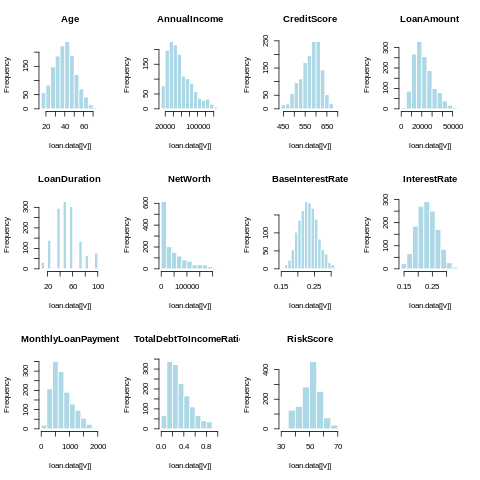

In [ ]:
%%R
num.vars <- c("Age","AnnualIncome","CreditScore","LoanAmount","LoanDuration",
              "NetWorth","BaseInterestRate","InterestRate",
              "MonthlyLoanPayment","TotalDebtToIncomeRatio","RiskScore")

par(mfrow=c(3,4))

for (v in num.vars) {
  hist(loan.data[[v]], main=v, col="lightblue", border="white")
}

par(mfrow=c(1,1))


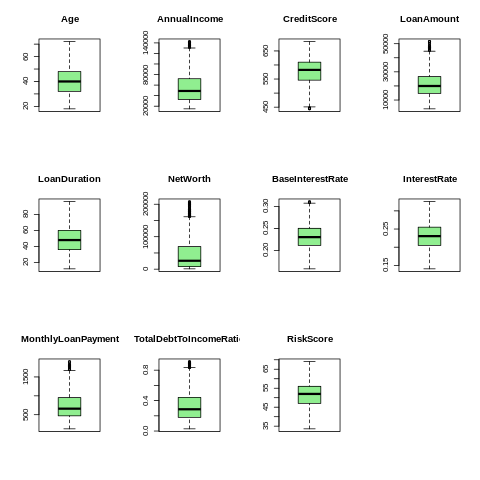

In [ ]:
%%R
num.vars <- c("Age","AnnualIncome","CreditScore","LoanAmount","LoanDuration",
              "NetWorth","BaseInterestRate","InterestRate",
              "MonthlyLoanPayment","TotalDebtToIncomeRatio","RiskScore")

par(mfrow=c(3,4))

for (v in num.vars) {
  boxplot(loan.data[[v]], main=v, col="lightgreen")
}

par(mfrow=c(1,1))


In [ ]:
%%R
num.vars <- c("Age","AnnualIncome","CreditScore","LoanAmount","LoanDuration",
              "NetWorth","BaseInterestRate","InterestRate",
              "MonthlyLoanPayment","TotalDebtToIncomeRatio","RiskScore")

summary.table <- data.frame(
  Variable = num.vars,
  Mean = sapply(loan.data[num.vars], mean, na.rm=TRUE),
  Median = sapply(loan.data[num.vars], median, na.rm=TRUE),
  SD = sapply(loan.data[num.vars], sd, na.rm=TRUE),
  Min = sapply(loan.data[num.vars], min, na.rm=TRUE),
  Max = sapply(loan.data[num.vars], max, na.rm=TRUE)
)

summary.table


                                     Variable         Mean       Median
Age                                       Age 4.023761e+01 4.000000e+01
AnnualIncome                     AnnualIncome 5.488260e+04 4.886500e+04
CreditScore                       CreditScore 5.765401e+02 5.825000e+02
LoanAmount                         LoanAmount 2.158061e+04 1.994000e+04
LoanDuration                     LoanDuration 5.155977e+01 4.800000e+01
NetWorth                             NetWorth 4.587719e+04 2.589400e+04
BaseInterestRate             BaseInterestRate 2.312770e-01 2.303390e-01
InterestRate                     InterestRate 2.308364e-01 2.305181e-01
MonthlyLoanPayment         MonthlyLoanPayment 7.401111e+02 6.596342e+02
TotalDebtToIncomeRatio TotalDebtToIncomeRatio 3.305280e-01 2.860487e-01
RiskScore                           RiskScore 5.113324e+01 5.200000e+01
                                 SD          Min          Max
Age                    1.128397e+01 1.800000e+01 7.200000e+01
AnnualIncome

In [ ]:
%%R
model <- lm(LoanAmount ~ CreditScore, data = loan.data)
summary(model)



Call:
lm(formula = LoanAmount ~ CreditScore, data = loan.data)

Residuals:
   Min     1Q Median     3Q    Max 
-17711  -6810  -1669   5138  29864 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13899.66    3175.16   4.378 1.29e-05 ***
CreditScore    13.32       5.49   2.427   0.0154 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9207 on 1370 degrees of freedom
Multiple R-squared:  0.004279,	Adjusted R-squared:  0.003553 
F-statistic: 5.888 on 1 and 1370 DF,  p-value: 0.01537



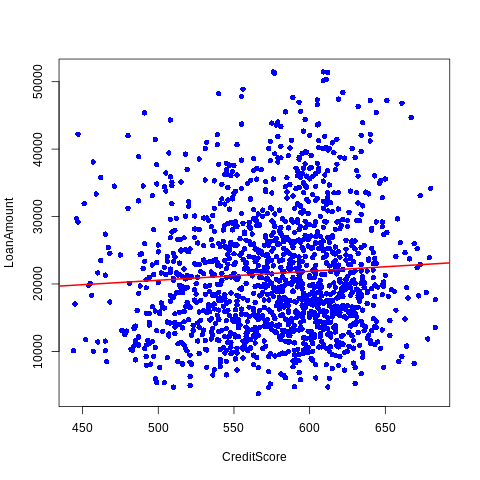

In [ ]:
%%R
plot(loan.data$CreditScore, loan.data$LoanAmount,
     xlab="CreditScore", ylab="LoanAmount",
     col="blue", pch=16)

abline(model, col="red", lwd=2)


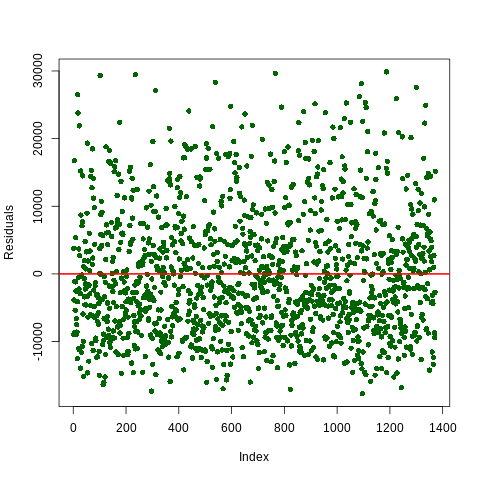

In [ ]:
%%R
plot(model$residuals,
     col="darkgreen", pch=16,
     ylab="Residuals", xlab="Index")

abline(h=0, col="red", lwd=2)
